In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import sklearn
from sklearn.neighbors import KernelDensity

# 1(a)

In [2]:
# Loading full data
df = pd.read_csv('hour.csv')

In [3]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
#remove outliers

In [6]:
def find_outliers(x):
    Q1=np.percentile(x,25)
    Q3=np.percentile(x,75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    outlier_ind=list(x.index[(x<lower)|(x>upper)])
    outlier_value=list(x[outlier_ind])
    return outlier_ind,outlier_value

In [7]:
find_outliers(df['temp'])[0]
df=df.drop(find_outliers(df['temp'])[0],axis=0)

In [8]:
find_outliers(df['atemp'])[0]
df_2012=df.drop(find_outliers(df['temp'])[0],axis=0)

In [9]:
find_outliers(df['hum'])[0]
df_2012=df.drop(find_outliers(df['temp'])[0],axis=0)

In [10]:
find_outliers(df['windspeed'])[0]
df_2012=df.drop(find_outliers(df['temp'])[0],axis=0)

In [11]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


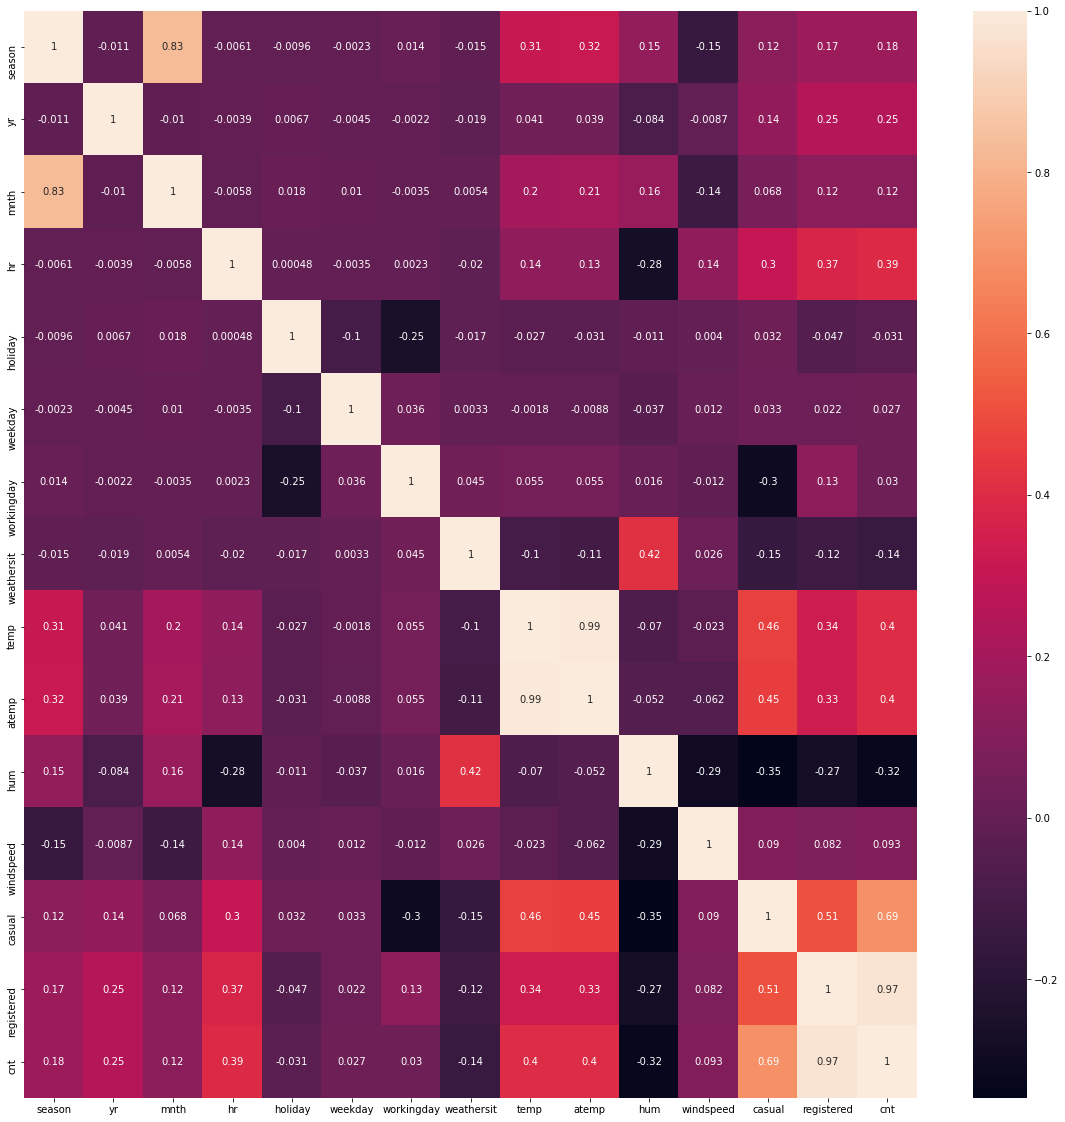

In [12]:
#correlation matrix
import seaborn as sns
corr_data =df.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]

cor_mat=corr_data.corr()

fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(cor_mat,annot = True)

plt.show()

In [13]:
#feature selected by correlation matrix
df_pre=df[['season','yr','hr','weathersit','temp','hum','windspeed','holiday','weekday','workingday','cnt']]

In [14]:
df_pre

,season,yr,hr,weathersit,temp,hum,windspeed,holiday,weekday,workingday,cnt
0,1,0,0,1,0.24,0.81,0.0000,0,6,0,16
1,1,0,1,1,0.22,0.80,0.0000,0,6,0,40
2,1,0,2,1,0.22,0.80,0.0000,0,6,0,32
3,1,0,3,1,0.24,0.75,0.0000,0,6,0,13
4,1,0,4,1,0.24,0.75,0.0000,0,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,19,2,0.26,0.60,0.1642,0,1,1,119
17375,1,1,20,2,0.26,0.60,0.1642,0,1,1,89
17376,1,1,21,1,0.26,0.60,0.1642,0,1,1,90
17377,1,1,22,1,0.26,0.56,0.1343,0,1,1,61


In [15]:
X=df_pre.iloc[:,:-1]

In [16]:
y=df_pre.iloc[:,-1]

In [17]:
#create dummy variables for categorical data

In [18]:
X_mod = pd.get_dummies(X, columns=['weathersit'])

In [19]:
X_mod = pd.get_dummies(X_mod, columns=['hr'])

In [20]:
X_mod = pd.get_dummies(X_mod, columns=['season'])

In [21]:
X_mod = pd.get_dummies(X_mod, columns=['weekday'])

In [22]:
X_mod.columns

Index(['yr', 'temp', 'hum', 'windspeed', 'holiday', 'workingday',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4', 'hr_0',
       'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9',
       'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17',
       'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'season_1',
       'season_2', 'season_3', 'season_4', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [23]:
X_SVR=X_mod.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
                                  ,35,36,37,38,39,40,41,42,43,44]]
y_SVR=y

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR

In [25]:
#splitting into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_SVR, y_SVR, test_size = 0.3, random_state = 0)

In [26]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [28]:
#parameter selection

In [29]:
from numpy import arange
C_param=[]
gamma_param=[]
accuracy_testing=[]
accuracy_training=[]
for c in arange(1,100,10):
    for gama in arange (0.001,.05,.01):
        
        C_param.append(c)
        gamma_param.append(gama)
        
        model=SVR(kernel="rbf",C=c,gamma=gama)
        model.fit(X_train,y_train)
        y_train_predicted=model.predict(X_train)
        rmse_training=sqrt(mean_squared_error(y_train,y_train_predicted))
        accuracy_training.append(rmse_training)
        
        
        y_test_predicted=model.predict(X_test)
        rmse_testing=sqrt(mean_squared_error(y_test,y_test_predicted))
        accuracy_testing.append(rmse_testing)
        
        print("C: ",c)
        print("gamma: ",gama)
        print("RMSE for training: ",rmse_training)
        print("RMSE for testing: ",rmse_testing)
    

C:  1
gamma:  0.001
RMSE for training:  170.71551122651576
RMSE for testing:  171.3948787561092
C:  1
gamma:  0.011
RMSE for training:  132.19115237306661
RMSE for testing:  132.88145083901043
C:  1
gamma:  0.020999999999999998
RMSE for training:  129.26693068552137
RMSE for testing:  130.2426306304434
C:  1
gamma:  0.030999999999999996
RMSE for training:  133.81062760415873
RMSE for testing:  135.03109837500992
C:  1
gamma:  0.040999999999999995
RMSE for training:  140.45927902323567
RMSE for testing:  141.9151464391252
C:  11
gamma:  0.001
RMSE for training:  121.56455960983097
RMSE for testing:  122.17693525690399
C:  11
gamma:  0.011
RMSE for training:  85.12073587417011
RMSE for testing:  87.09490219091491
C:  11
gamma:  0.020999999999999998
RMSE for training:  70.87099196924753
RMSE for testing:  73.62656485389553
C:  11
gamma:  0.030999999999999996
RMSE for training:  65.75647928069876
RMSE for testing:  69.17109483262425
C:  11
gamma:  0.040999999999999995
RMSE for training:  6

In [30]:
C_gamma_t_SVR=pd.DataFrame(list(zip(C_param, gamma_param,accuracy_training)),
               columns =['C', 'gamma','Training RMSE'])


pivot_c_g_t_SVR=pd.pivot_table(C_gamma_t_SVR, 
               index=['C'],columns=['gamma'],
                      values=['Training RMSE'])



In [31]:
pivot_c_g_t_SVR

Training RMSE                                                
gamma         0.001       0.011       0.021       0.031       0.041
C                                                                  
1        170.715511  132.191152  129.266931  133.810628  140.459279
11       121.564560   85.120736   70.870992   65.756479   65.027519
21       112.388075   73.276995   59.324499   54.637782   53.352084
31       109.015431   66.223635   54.146459   50.318825   48.689900
41       107.092120   61.929433   51.402096   47.557390   45.824801
51       105.734867   59.178656   49.587451   45.752002   43.979250
61       104.748693   57.047408   48.227573   44.442836   42.613303
71       104.074722   55.502374   47.160268   43.406745   41.570607
81       103.470062   54.393182   46.283055   42.575434   40.711350
91       102.868636   53.513835   45.556585   41.895175   39.990533

In [32]:
C_gamma_ts_SVR=pd.DataFrame(list(zip(C_param, gamma_param,accuracy_testing)),
               columns =['C', 'gamma','Testing RMSE'])


pivot_c_g_ts_SVR=pd.pivot_table(C_gamma_ts_SVR, 
               index=['C'],columns=['gamma'],
                      values=['Testing RMSE'])



In [33]:
pivot_c_g_ts_SVR

Testing RMSE                                                
gamma        0.001       0.011       0.021       0.031       0.041
C                                                                 
1       171.394879  132.881451  130.242631  135.031098  141.915146
11      122.176935   87.094902   73.626565   69.171095   68.953066
21      113.193518   75.669831   62.774434   59.060246   58.494544
31      109.999965   68.900427   58.319573   55.497790   54.870886
41      108.208030   64.800310   55.914024   53.441700   52.891532
51      106.879942   62.338766   54.431075   52.169314   51.829253
61      105.927730   60.366490   53.374278   51.319357   51.045775
71      105.315062   58.981605   52.607308   50.687572   50.497441
81      104.718043   58.037802   51.978677   50.205735   50.056837
91      104.149311   57.249007   51.445282   49.873825   49.725339

In [34]:
svm = SVR(kernel='rbf', C=91,gamma=.041).fit(X_train, y_train)

train_score=svm.score(X_train,y_train)
test_score=svm.score(X_test,y_test)
y_pred_rbf = svm.predict(X_test)
RMSE= sqrt(mean_squared_error(y_test, y_pred_rbf))

print('Accuracy on training set: {:.2f}'.format(train_score))
print('Accuracy on test set: {:.2f}'.format(test_score))
print("RMSE: ",RMSE)

Accuracy on training set: 0.95
Accuracy on test set: 0.93
RMSE:  49.725338750335226


In [35]:
X_rbf = np.array(df.drop(['cnt'],1))
Y_rbf= np.array(df['cnt'])
X_train_rbf,X_test_rbf, y_train_rbf, y_test_rbf= train_test_split(X_rbf, Y_rbf, test_size=0.3, random_state=0) 

In [36]:
X_test_rbf

array([[3440, '2011-05-28', 2, ..., 0.2239, 4, 3],
       [6543, '2011-10-05', 4, ..., 0.0, 1, 4],
       [15471, '2012-10-11', 4, ..., 0.1343, 81, 662],
       ...,
       [12511, '2012-06-10', 2, ..., 0.0896, 184, 315],
       [6843, '2011-10-17', 4, ..., 0.2537, 64, 238],
       [11263, '2012-04-19', 2, ..., 0.0, 46, 183]], dtype=object)

In [37]:
X_test_rbf[0,1]

'2011-05-28'

In [38]:
y_test_dates=[]
for row in range(len(y_test_rbf)):
    time=X_test_rbf[row,1]+' hr:'+str(X_test_rbf[row,5])
    y_test_dates.append(time)

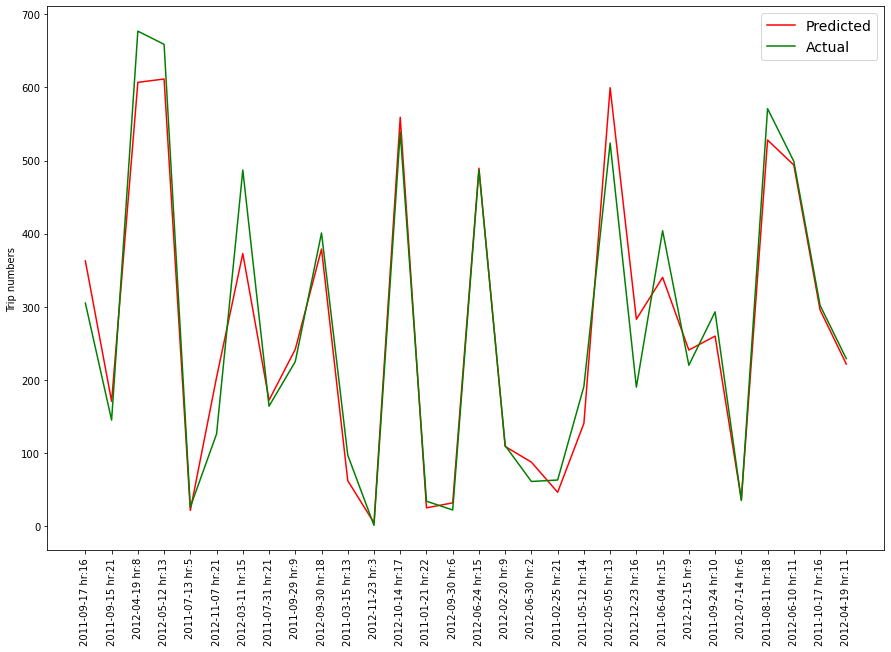

In [39]:
from matplotlib import rcParams
predicted=np.array(y_pred_rbf[-30:]) 
actual=np.array(y_test[-30:])
plt.figure(figsize=(15,10))
predict_rbf,=plt.plot(y_test_dates[-30:],predicted,label="Predicted",color="red")
actual_rbf,=plt.plot(y_test_dates[-30:],actual,label="Actual",color="green")
plt.legend([predict_rbf,actual_rbf],['Predicted','Actual'],fontsize=14)
plt.ylabel("Trip numbers")
plt.xticks(rotation=90)
rcParams['font.family'] = 'Times New Roman'
rcParams.update({'font.size': 14})
plt.show()

# (b)

In [40]:
#linear lernel
from numpy import arange
C_param=[]
rmse_testing_li=[]
rmse_training_li=[]
for c in arange(1,100,10):       
        C_param.append(c)
        
        model=SVR(kernel="linear",C=c)
        model.fit(X_train,y_train)
        y_train_predicted_linear=model.predict(X_train)
        rmse_training=sqrt(mean_squared_error(y_train,y_train_predicted_linear))
        rmse_training_li.append(rmse_training)
        
        
        y_test_predicted=model.predict(X_test)
        rmse_testing=sqrt(mean_squared_error(y_test,y_test_predicted))
        rmse_testing_li.append(rmse_testing)
        
        print("C: ",c)
        print("RMSE for training-linear: ",rmse_training)
        print("RMSE for testing-linear: ",rmse_testing)      




C:  1
RMSE for training-linear:  105.7706989304
RMSE for testing-linear:  107.04432597259027
C:  11
RMSE for training-linear:  105.74263055905963
RMSE for testing-linear:  106.98276401980807
C:  21
RMSE for training-linear:  105.74032372304822
RMSE for testing-linear:  106.98276795206463
C:  31
RMSE for training-linear:  105.7402865116121
RMSE for testing-linear:  106.98322809268656
C:  41
RMSE for training-linear:  105.74031594182063
RMSE for testing-linear:  106.98334939736127
C:  51
RMSE for training-linear:  105.74058517167713
RMSE for testing-linear:  106.98338387604167
C:  61
RMSE for training-linear:  105.74058693069358
RMSE for testing-linear:  106.98338608712608
C:  71
RMSE for training-linear:  105.74225750867693
RMSE for testing-linear:  106.98593153138314
C:  81
RMSE for training-linear:  105.74217137514124
RMSE for testing-linear:  106.98587567970378
C:  91
RMSE for training-linear:  105.74215201098279
RMSE for testing-linear:  106.98584878879512


In [42]:
model=SVR(kernel="linear",C=21)
model.fit(X_train,y_train)
y_train_predicted_li=model.predict(X_train)
rmse_training_li=sqrt(mean_squared_error(y_train,y_train_predicted_li))
print("RMSE training (linear): ",rmse_training)


y_test_predicted_li=model.predict(X_test)
rmse_testing_li=sqrt(mean_squared_error(y_test,y_test_predicted_li))
print("RMSE testing (linear): ",rmse_testing)

RMSE training (linear):  105.74215201098279
RMSE testing (linear):  106.98584878879512


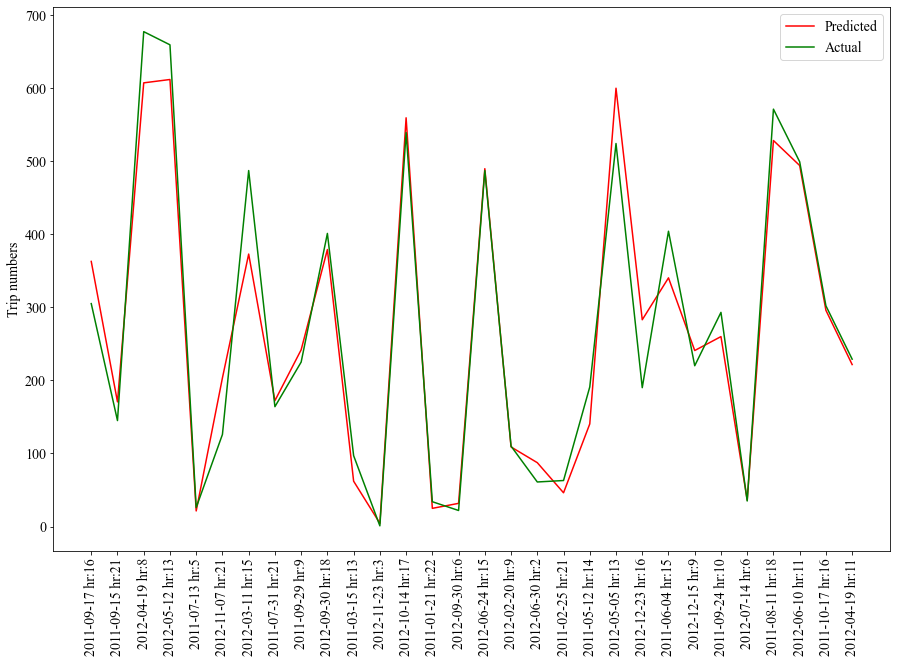

In [43]:
from matplotlib import rcParams
predicted_li=np.array(y_test_predicted_li[-30:])
actual=np.array(y_test[-30:])
plt.figure(figsize=(15,10))
predict_rbf,=plt.plot(y_test_dates[-30:],predicted,label="Predicted",color="red")
actual_rbf,=plt.plot(y_test_dates[-30:],actual,label="Actual",color="green")
plt.legend([predict_rbf,actual_rbf],['Predicted','Actual'],fontsize=14)
plt.ylabel("Trip numbers")
plt.xticks(rotation=90)
rcParams['font.family'] = 'Times New Roman'
rcParams.update({'font.size': 14})
plt.show()

In [44]:
#polynomial
from numpy import arange
C_param=[]
d_param=[]
rmse_testing_poly=[]
rmse_training_poly=[]
for c in arange(1,100,10):
    for d in arange(2,6,1):
        C_param.append(c)
        d_param.append(d)
        
        model=SVR(kernel="poly",C=c,degree=d)
        model.fit(X_train,y_train)
        y_train_predicted_linear=model.predict(X_train)
        rmse_training=sqrt(mean_squared_error(y_train,y_train_predicted_linear))
        rmse_training_poly.append(rmse_training)
        
        
        y_test_predicted=model.predict(X_test)
        rmse_testing=sqrt(mean_squared_error(y_test,y_test_predicted))
        rmse_testing_poly.append(rmse_testing)
        
        print("C: ",c)
        print("degree: ",d)
        print("RMSE for training-poly: ",rmse_training)
        print("RMSE for testing-poly: ",rmse_testing) 


C:  1
degree:  2
RMSE for training-poly:  144.57999497049875
RMSE for testing-poly:  145.96214645777803
C:  1
degree:  3
RMSE for training-poly:  149.4213291557344
RMSE for testing-poly:  150.74124855994285
C:  1
degree:  4
RMSE for training-poly:  161.53472500375764
RMSE for testing-poly:  162.95895210444488
C:  1
degree:  5
RMSE for training-poly:  168.06303203937168
RMSE for testing-poly:  169.52544302301666
C:  11
degree:  2
RMSE for training-poly:  91.32693815350079
RMSE for testing-poly:  94.62354335941781
C:  11
degree:  3
RMSE for training-poly:  70.11230332118431
RMSE for testing-poly:  73.40681415348756
C:  11
degree:  4
RMSE for training-poly:  79.05106867435394
RMSE for testing-poly:  83.41081880148087
C:  11
degree:  5
RMSE for training-poly:  89.63976416938006
RMSE for testing-poly:  94.29094955021948
C:  21
degree:  2
RMSE for training-poly:  83.61390903033706
RMSE for testing-poly:  87.4532661680209
C:  21
degree:  3
RMSE for training-poly:  57.50664627949681
RMSE for t

In [45]:
C_d_t_SVR=pd.DataFrame(list(zip(C_param, d_param,rmse_testing_poly)),
               columns =['C', 'degree','Testing RMSE'])

pivot_c_d_t_SVR=pd.pivot_table(C_d_t_SVR, 
               index=['C'],columns=['degree'],
                      values=['Testing RMSE'])

In [46]:
pivot_c_d_t_SVR

Testing RMSE                                    
degree            2           3           4           5
C                                                      
1        145.962146  150.741249  162.958952  169.525443
11        94.623543   73.406814   83.410819   94.290950
21        87.453266   61.991187   66.433248   73.025132
31        85.087518   57.951940   60.402191   65.224447
41        83.786765   55.494349   57.323866   61.111894
51        82.923788   54.116061   55.491939   58.741341
61        82.344088   53.202434   54.340106   57.344614
71        81.992115   52.621684   53.674539   56.449846
81        81.689839   52.236893   53.274116   55.891302
91        81.454208   51.945069   53.001489   55.449964

In [47]:
model=SVR(kernel="poly",C=91,degree=3)
model.fit(X_train,y_train)
y_train_predicted_poly=model.predict(X_train)
rmse_training_poly=sqrt(mean_squared_error(y_train,y_train_predicted_poly))
print("RMSE training (poly): ",rmse_training_poly)

y_test_predicted_poly=model.predict(X_test)
rmse_testing_poly=sqrt(mean_squared_error(y_test,y_test_predicted_poly))
print("RMSE testing (poly): ",rmse_testing_poly)

RMSE training (poly):  44.27476825651979
RMSE testing (poly):  51.94506932796076


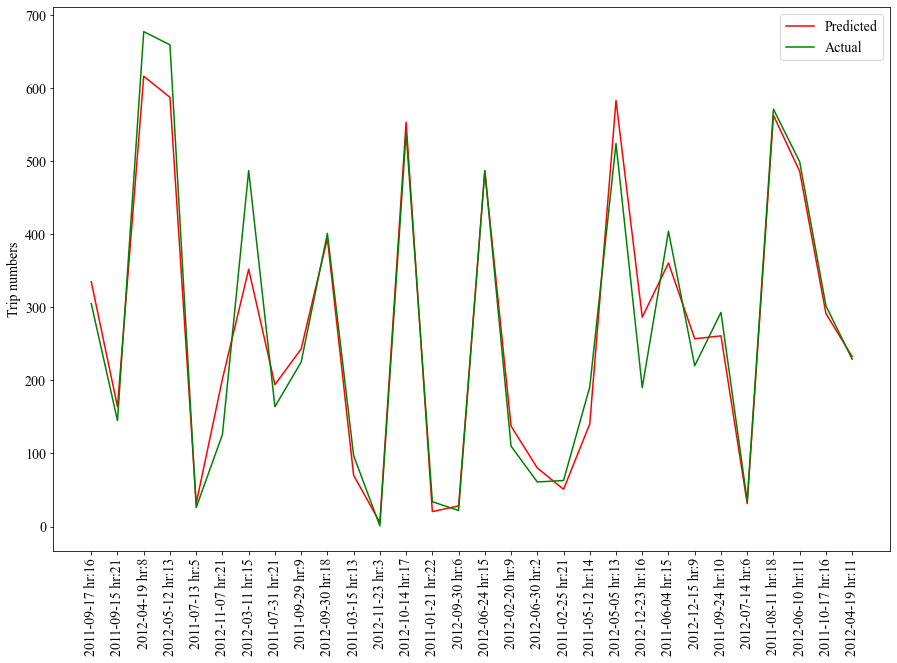

In [48]:
from matplotlib import rcParams
predicted_poly=np.array(y_test_predicted_poly[-30:])
actual=np.array(y_test[-30:])
plt.figure(figsize=(15,10))
predict_poly,=plt.plot(y_test_dates[-30:],predicted_poly,label="Predicted",color="red")
actual_poly,=plt.plot(y_test_dates[-30:],actual,label="Actual",color="green")
plt.legend([predict_poly,actual_poly],['Predicted','Actual'],fontsize=14)
plt.ylabel("Trip numbers")
plt.xticks(rotation=90)
rcParams['font.family'] = 'Times New Roman'
rcParams.update({'font.size': 14})
plt.show()